In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [5]:
print("ghj")

ghj


In [3]:
df = pd.read_csv("bank_data.csv")

In [4]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [5]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [6]:
df.drop_duplicates()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [19]:
!pip install seaborn


You should consider upgrading via the 'C:\Users\SUMIT\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


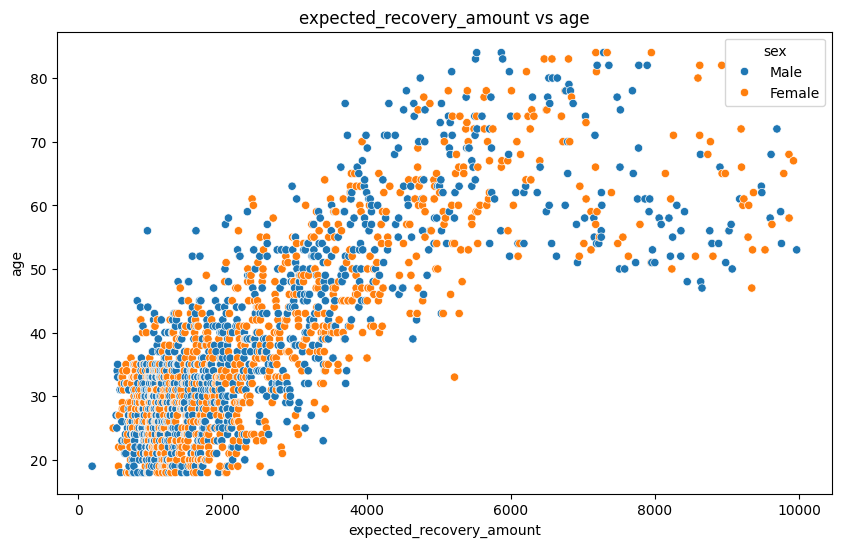

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'expected_recovery_amount' , y = 'age',hue='sex', data = df)
plt.title("expected_recovery_amount vs age")
plt.xlabel('expected_recovery_amount')
plt.ylabel('age')
plt.show()

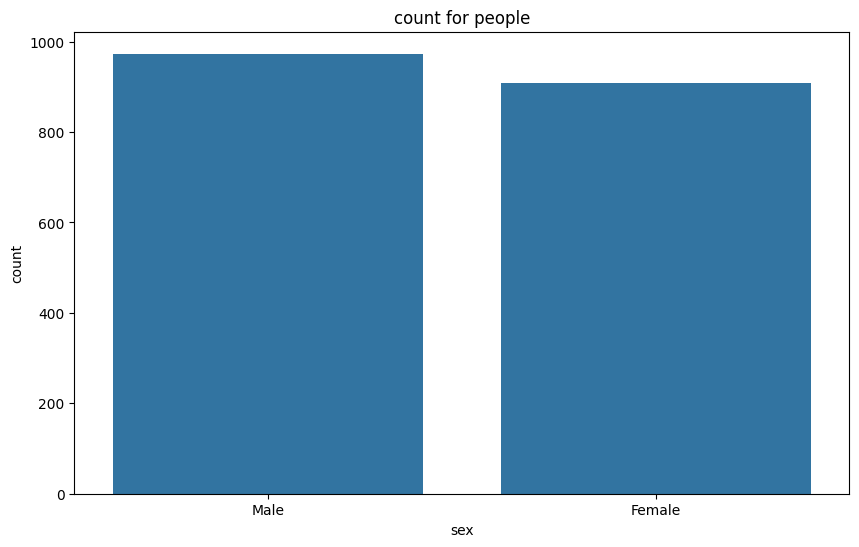

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data=df)
plt.title("count for people")
plt.xlabel('sex')
plt.ylabel('count')
plt.show()

In [26]:
!pip install statsmodels

You should consider upgrading via the 'C:\Users\SUMIT\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


model without threshold
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            19:36:12   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

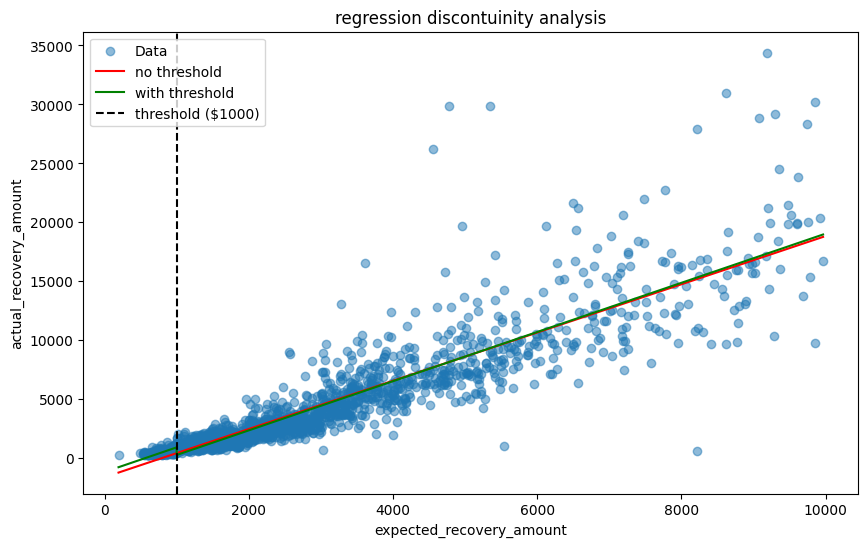

In [9]:
# creating the threshold to identify whether the additional cost is justified by the increased recovery.

# adding binary variable if amount is above threshold
df['above threshold'] = np.where(df['expected_recovery_amount'] > 1000 , 1 , 0)

no_threshold = sm.OLS(df['actual_recovery_amount'] , sm.add_constant(df['expected_recovery_amount'])).fit()

with_threshold = sm.OLS(df['actual_recovery_amount'], sm.add_constant(df[['expected_recovery_amount' , 'above threshold']])).fit()

print("model without threshold")
print(no_threshold.summary())

print("model with threshold")
print(with_threshold.summary())

# Plotting regression lines

plt.figure(figsize=(10,6))
plt.scatter(df['expected_recovery_amount'],df['actual_recovery_amount'] , alpha = 0.5 , label='Data')
plt.plot(df['expected_recovery_amount'], no_threshold.predict(sm.add_constant(df['expected_recovery_amount'])), label = 'no threshold', color ='red')
plt.plot(df['expected_recovery_amount'], with_threshold.predict(sm.add_constant(df[['expected_recovery_amount', 'above threshold']])), label = 'with threshold', color='green')
plt.axvline(x = 1000, color='black',linestyle = '--',label = 'threshold ($1000)')
plt.title("regression discontuinity analysis")
plt.xlabel("expected_recovery_amount")
plt.ylabel("actual_recovery_amount")
plt.legend()
plt.show()

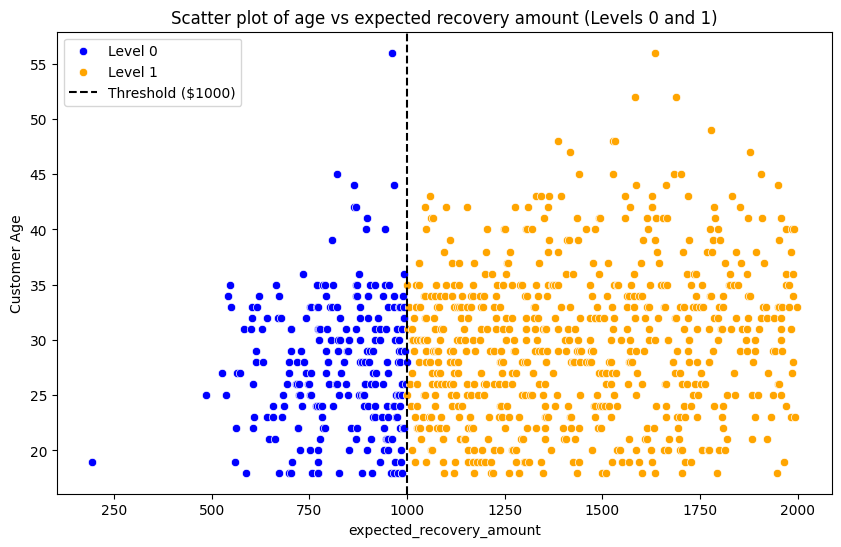

In [17]:
level_0_data = df[(df['expected_recovery_amount'] > 0) & (df['expected_recovery_amount'] <= 1000)]
level_1_data = df[(df['expected_recovery_amount'] > 1000) & (df['expected_recovery_amount'] <= 2000)]

plt.figure(figsize=(10,6))

# age scatterplot as function of expected  recovery amount for lavel 0

sns.scatterplot(x= 'expected_recovery_amount' , y='age' , data = level_0_data , color='blue', label='Level 0')


# age scatterplot as function of expected  recovery amount for lavel 1

sns.scatterplot(x= 'expected_recovery_amount' , y='age' , data = level_1_data , color='orange', label='Level 1')

plt.axvline(x=1000, color='black', linestyle='--', label='Threshold ($1000)')

plt.xlabel('expected_recovery_amount')
plt.ylabel('Customer Age')
plt.title('Scatter plot of age vs expected recovery amount (Levels 0 and 1)')
plt.legend()


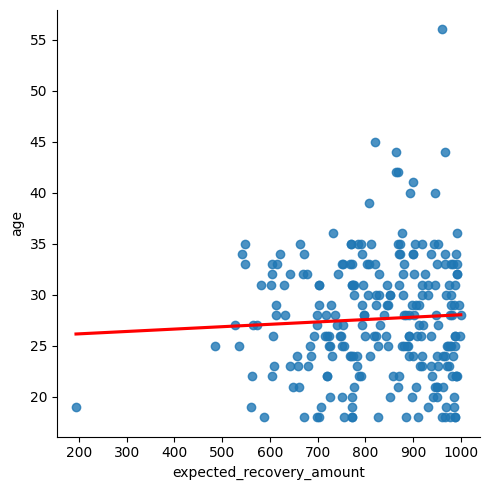

In [24]:
sns.lmplot(x='expected_recovery_amount', y='age', data=level_0_data, ci=None, line_kws={'color': 'red'})


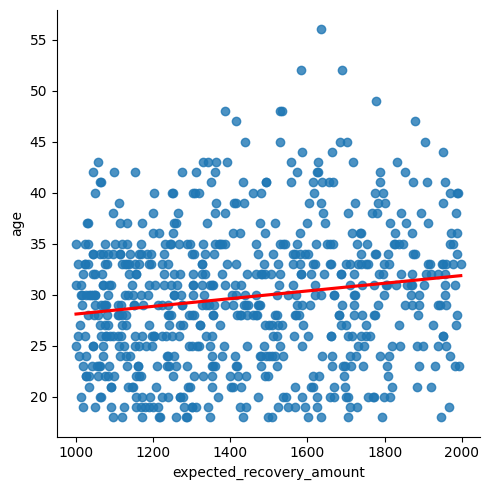

In [21]:
sns.lmplot(x='expected_recovery_amount', y='age', data=level_1_data, ci=None, line_kws={'color': 'red'})


In [25]:
!pip install scipy

You should consider upgrading via the 'C:\Users\SUMIT\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [27]:
lower_r = 900
upper_r = 1100

data_in_range = df[(df['expected_recovery_amount'] >= lower_r) & (df['expected_recovery_amount'] <= upper_r)]

# seperating data for levels of above and below the threshold

above_threshold = data_in_range[data_in_range['expected_recovery_amount'] > 1000]
below_threshold = data_in_range[data_in_range['expected_recovery_amount'] <= 1000]

# ttest for age
t_stat_age , p_value_age = ttest_ind(above_threshold['age'], below_threshold['age'], equal_var = False)

# results
print(f"T-statistic test for age = {t_stat_age}")
print(f"p-value for age = {p_value_age}")

if p_value_age < 0.05:
    print("There is difference in age around $1000 threshold")
else:
    print("there is no difference in age around $1000 threshold ")

T-statistic test for age = 1.6090357512691353
p-value for age = 0.10938147433215122
there is no difference in age around $1000 threshold 


In [29]:
contingency_table = pd.crosstab(df['sex'], df['expected_recovery_amount'] > 1000)

# chi-squared test

chi2_stat_sex, p_value_sex, _, _ = chi2_contingency(contingency_table)

print(f"chi square test for sex : {chi2_stat_sex}")
print(f"p-value for sex: {p_value_sex}")

if p_value_sex < 0.05:
    print("there is distribution in sex around $1000 threshold")
else:
    print("there is no distribution in sex around $1000 threshold")

chi square test for sex : 2.1768676619404688
p-value for sex: 0.14009934427173568
there is no distribution in sex around $1000 threshold


In [39]:

# Assuming 'df' is your DataFrame with columns 'expected_recovery_amount' and 'sex'

# Define the range for analysis
lower_bound = 900
upper_bound = 1100

# Extract data for the specified range
within_range = df[(df['expected_recovery_amount'] >= lower_bound) & (df['expected_recovery_amount'] <= upper_bound)]

# Separate data for levels above and below the $1000 threshold
above_threshold = within_range[within_range['expected_recovery_amount'] > 1000]
below_threshold = within_range[within_range['expected_recovery_amount'] <= 1000]

# Perform proportions z-test for sex
categories = df['sex'].unique()

for category in categories:
    count_above_threshold = above_threshold['sex'].value_counts().get(category, 0)
    count_below_threshold = below_threshold['sex'].value_counts().get(category, 0)

    # Perform proportions z-test
    z_stat_sex, p_value_sex = proportions_ztest([count_above_threshold, count_below_threshold],
                                               [len(above_threshold), len(below_threshold)])

    # Print the results
    print(f"Z-statistic for sex category '{category}': {z_stat_sex}")
    print(f"P-value for sex category '{category}': {p_value_sex}")

    # Check for statistical significance (using a common threshold like 0.05)
    if p_value_sex < 0.05:
        print(f"There is evidence of a significant difference in the percentage of sex category '{category}' around the $1000 threshold.")
    else:
        print(f"There is no significant difference in the percentage of sex category '{category}' around the $1000 threshold.")


Z-statistic for sex category 'Male': -0.8542405627635125
P-value for sex category 'Male': 0.3929717124814144
There is no significant difference in the percentage of sex category 'Male' around the $1000 threshold.
Z-statistic for sex category 'Female': 0.8542405627635125
P-value for sex category 'Female': 0.3929717124814144
There is no significant difference in the percentage of sex category 'Female' around the $1000 threshold.


In [33]:
!pip install statsmodels

You should consider upgrading via the 'C:\Users\SUMIT\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


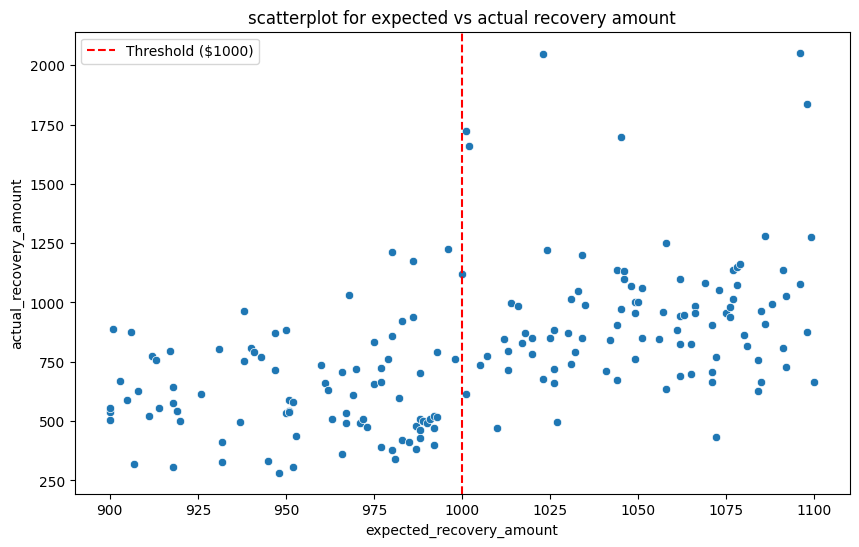

In [41]:
lower = 900
upper = 1100

in_range = df[(df['expected_recovery_amount'] >= lower) & (df['expected_recovery_amount'] <= upper)]

plt.figure(figsize=(10,6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=in_range)
plt.axvline(x=1000, color='red',linestyle='--', label='Threshold ($1000)')
plt.title("scatterplot for expected vs actual recovery amount")
plt.xlabel("expected_recovery_amount")
plt.ylabel("actual_recovery_amount")
plt.legend()
plt.show()

In [43]:


# Define the range
window_1 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
window_2 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Perform Kruskal-Wallis test for each window
statistic_1, p_value_1 = kruskal(window_1[window_1['expected_recovery_amount'] <= 1000]['actual_recovery_amount'],
                                 window_1[window_1['expected_recovery_amount'] > 1000]['actual_recovery_amount'])

statistic_2, p_value_2 = kruskal(window_2[window_2['expected_recovery_amount'] <= 1000]['actual_recovery_amount'],
                                 window_2[window_2['expected_recovery_amount'] > 1000]['actual_recovery_amount'])

#  results
print(f"Kruskal-Wallis Test for $900-$1100 window: Statistic = {statistic_1}, p-value = {p_value_1}")
print(f"Kruskal-Wallis Test for $950-$1050 window: Statistic = {statistic_2}, p-value = {p_value_2}")


Kruskal-Wallis Test for $900-$1100 window: Statistic = 64.89840778685254, p-value = 7.886077128395961e-16
Kruskal-Wallis Test for $950-$1050 window: Statistic = 30.9924872487249, p-value = 2.5902913533269003e-08


In [44]:



# Model without a threshold
X_no_threshold = df['expected_recovery_amount']
X_no_threshold = sm.add_constant(X_no_threshold)  # Add a constant term for the intercept
y_no_threshold = df['actual_recovery_amount']

model_no_threshold = sm.OLS(y_no_threshold, X_no_threshold).fit()

print(model_no_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            22:57:03   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [45]:
import statsmodels.api as sm

# Add an indicator variable for the true threshold
df['above_threshold'] = (df['expected_recovery_amount'] > 1000).astype(int)

# Fit the regression model with the true threshold
model_with_threshold = sm.OLS(df['actual_recovery_amount'], sm.add_constant(df[['expected_recovery_amount', 'above_threshold']])).fit()

# Display the regression results
print(model_with_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            22:59:04   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------